In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("data/online_retail.xlsx")

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
contries = df['Country']
contries.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [10]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_sales

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [11]:
product_sales = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)
product_sales

StockCode
DOT             206245.480
22423           164762.190
47566            98302.980
85123A           97894.500
85099B           92356.030
                   ...    
BANK CHARGES     -7175.639
CRUK             -7933.430
B               -11062.060
M               -68674.190
AMAZONFEE      -221520.500
Name: TotalSales, Length: 4070, dtype: float64

In [12]:
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
customer_sales

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
             ...    
12503.0     -1126.00
17603.0     -1165.30
14213.0     -1192.20
15369.0     -1592.49
17448.0     -4287.63
Name: TotalSales, Length: 4372, dtype: float64

In [13]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Day'] = df['InvoiceDate'].dt.day

<Axes: xlabel='Year'>

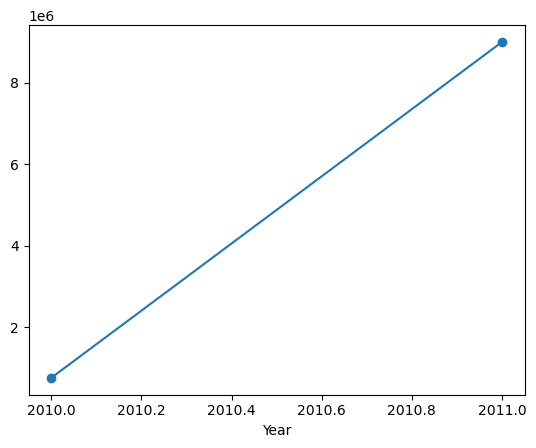

In [14]:
yearly_sales = df.groupby('Year')['TotalSales'].sum()
yearly_sales.plot(kind='line', marker='o')

<Axes: xlabel='Year,Month'>

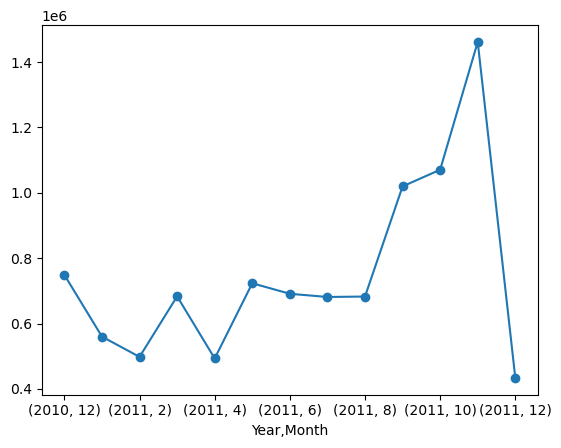

In [15]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum()
monthly_sales.plot(kind='line', marker='o')

<Axes: xlabel='Month', ylabel='TotalSales'>

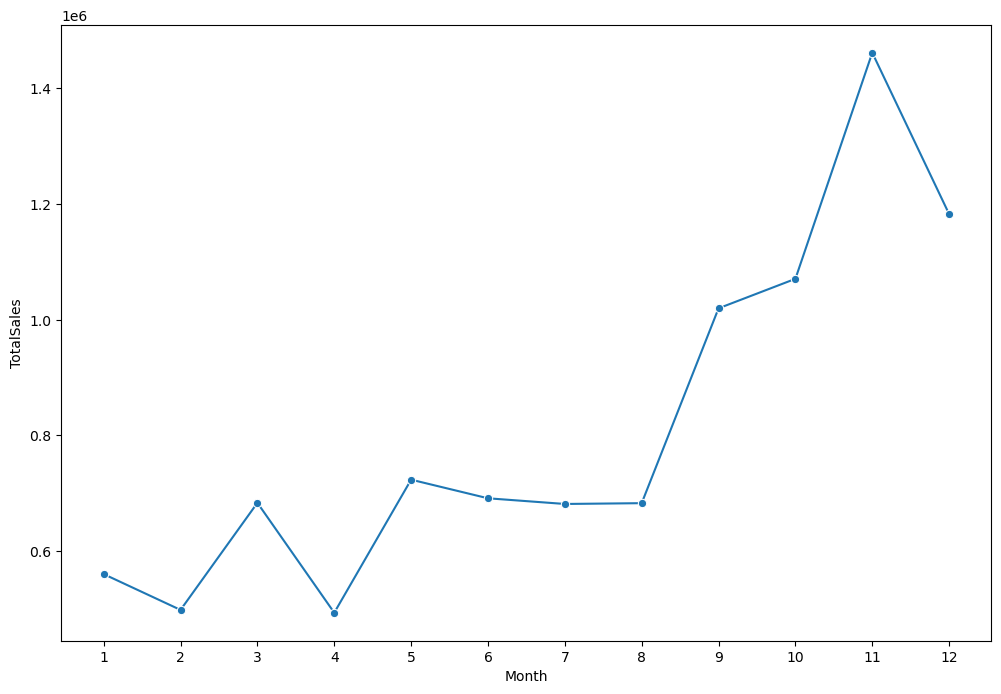

In [16]:
peek_month = df.groupby(['Month'])['TotalSales'].sum()
plt.figure(figsize = (12, 8))
plt.xticks(range(1, 13))
sns.lineplot(peek_month, marker='o')


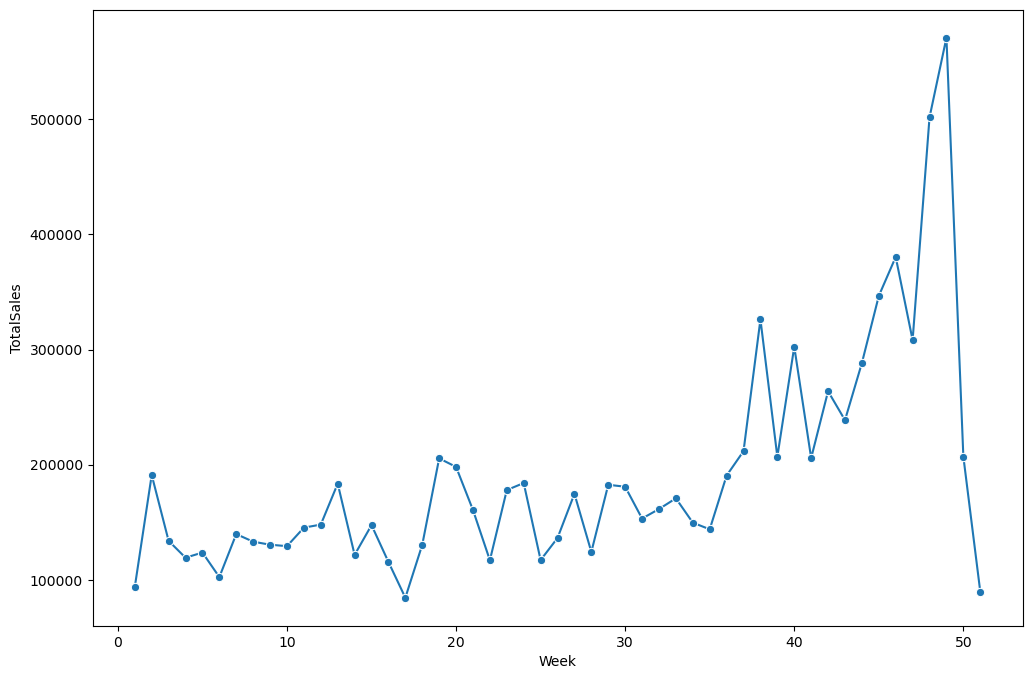

In [17]:
peek_week = df.groupby(['Week'])['TotalSales'].sum()
plt.figure(figsize = (12, 8))
sns.lineplot(peek_week, marker='o')
plt.show()

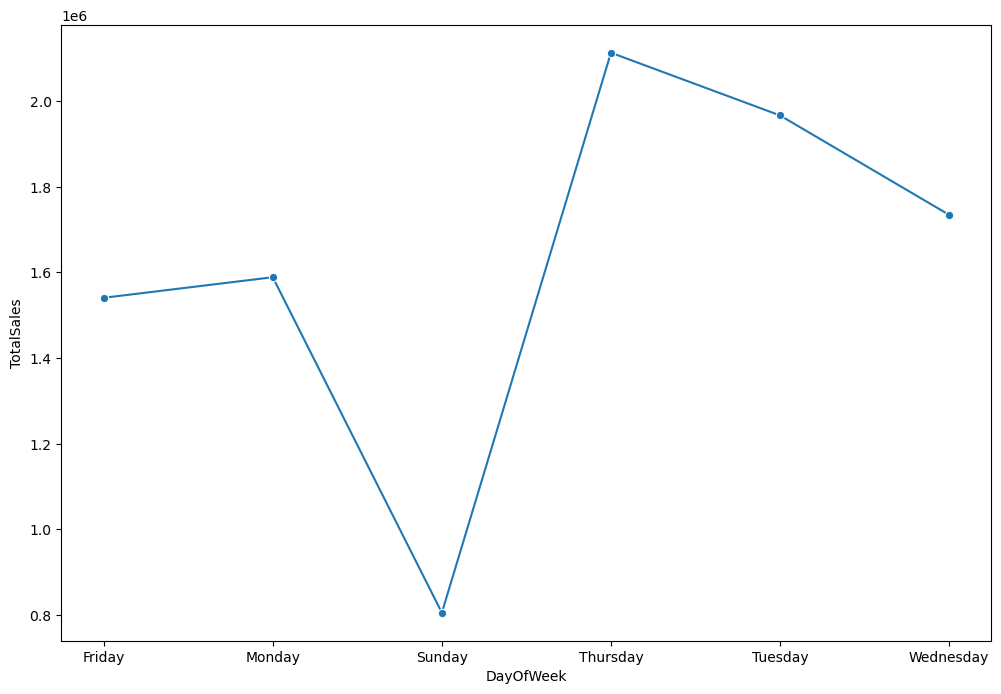

In [18]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
daily_sales = df.groupby('DayOfWeek')['TotalSales'].sum()
plt.figure(figsize = (12, 8))
sns.lineplot(daily_sales, marker='o')
plt.show()

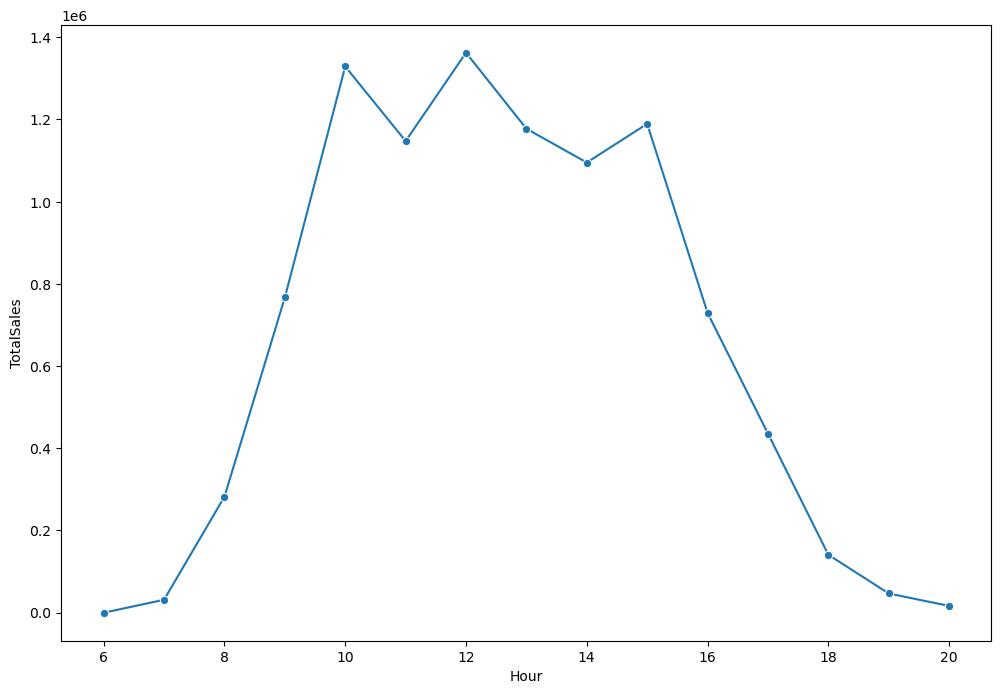

In [19]:
df['Hour'] = df['InvoiceDate'].dt.hour
peek_hour = df.groupby(['Hour'])['TotalSales'].sum()
plt.figure(figsize = (12, 8))
sns.lineplot(peek_hour, marker='o')
plt.show()